## Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
pd.options.display.max_columns=100
pd.options.display.max_rows = 100

import warnings
warnings.filterwarnings("ignore")

In [518]:
import os
os.getcwd

<function nt.getcwd()>

In [519]:
data = pd.read_csv('online_shoppers_intention.csv')

## Understanding The Data

In [520]:
data.head()

,AcctPagesViewed,AcctPageTime,InfoPagesViewed,InfoPageTime,ProductPagesViewed,ProductPageTime,AvgBounceRate,AvgExitRate,AvgPageValue,ProximityToSpecialDay,VisitMonth,UserOS,UserBrowser,UserRegion,SourceChannel,UserCategory,IsWeekendVisit,MadePurchase
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [521]:
data.describe()

,AcctPagesViewed,AcctPageTime,InfoPagesViewed,InfoPageTime,ProductPagesViewed,ProductPageTime,AvgBounceRate,AvgExitRate,AvgPageValue,ProximityToSpecialDay,UserOS,UserBrowser,UserRegion,SourceChannel
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [522]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AcctPagesViewed        12330 non-null  int64  
 1   AcctPageTime           12330 non-null  float64
 2   InfoPagesViewed        12330 non-null  int64  
 3   InfoPageTime           12330 non-null  float64
 4   ProductPagesViewed     12330 non-null  int64  
 5   ProductPageTime        12330 non-null  float64
 6   AvgBounceRate          12330 non-null  float64
 7   AvgExitRate            12330 non-null  float64
 8   AvgPageValue           12330 non-null  float64
 9   ProximityToSpecialDay  12330 non-null  float64
 10  VisitMonth             12330 non-null  object 
 11  UserOS                 12330 non-null  int64  
 12  UserBrowser            12330 non-null  int64  
 13  UserRegion             12330 non-null  int64  
 14  SourceChannel          12330 non-null  int64  
 15  Us

In [523]:
data.columns

Index(['AcctPagesViewed', 'AcctPageTime', 'InfoPagesViewed', 'InfoPageTime',
       'ProductPagesViewed', 'ProductPageTime', 'AvgBounceRate', 'AvgExitRate',
       'AvgPageValue', 'ProximityToSpecialDay', 'VisitMonth', 'UserOS',
       'UserBrowser', 'UserRegion', 'SourceChannel', 'UserCategory',
       'IsWeekendVisit', 'MadePurchase'],
      dtype='object')

In [524]:
behavorial_features = ['AcctPagesViewed', 'AcctPageTime', 'InfoPagesViewed', 'InfoPageTime',
       'ProductPagesViewed', 'ProductPageTime', 'AvgBounceRate', 'AvgExitRate',
       'AvgPageValue', 'ProximityToSpecialDay', 'VisitMonth']

user_demographic_features = ['UserBrowser', 'UserRegion', 'SourceChannel', 'UserCategory',
       'IsWeekendVisit']
target_feature = ['MadePurchase']

### From the above cells and given project description we can say the following things
1. All the 10 behavioral features are of numeric type except the 'VisitMonth' is of string type.
2. All the other features are assumed to be categorical.
3. No Null values in the data.
4. Target Feature is MadePurchase which is Boolean type.

In [525]:
# converting the datatypes from boolean to int for further analysis of data

data['IsWeekendVisit']=data['IsWeekendVisit'].astype(int)
data['MadePurchase'] = data['MadePurchase'].astype(int)

data.head()

,AcctPagesViewed,AcctPageTime,InfoPagesViewed,InfoPageTime,ProductPagesViewed,ProductPageTime,AvgBounceRate,AvgExitRate,AvgPageValue,ProximityToSpecialDay,VisitMonth,UserOS,UserBrowser,UserRegion,SourceChannel,UserCategory,IsWeekendVisit,MadePurchase
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


## Handling Missing Values

In [526]:
# No handling of missing values as there are none

## Outlier analysis and pattern analysis with target feature

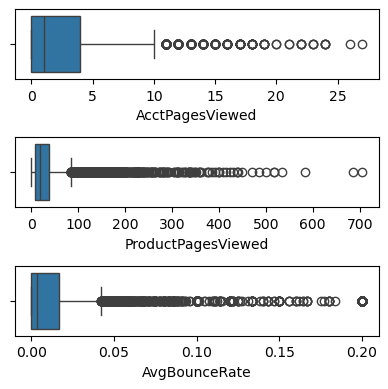

In [527]:
# check for outliers with the help of plots
fig,axis = plt.subplots(3, figsize = (4,4))
plt1 = sns.boxplot(data['AcctPagesViewed'],ax = axis[0],orient='h')
plt3 = sns.boxplot(data['ProductPagesViewed'],ax = axis[1],orient='h')
plt3 = sns.boxplot(data['AvgBounceRate'],ax=axis[2],orient='h')
plt.tight_layout()

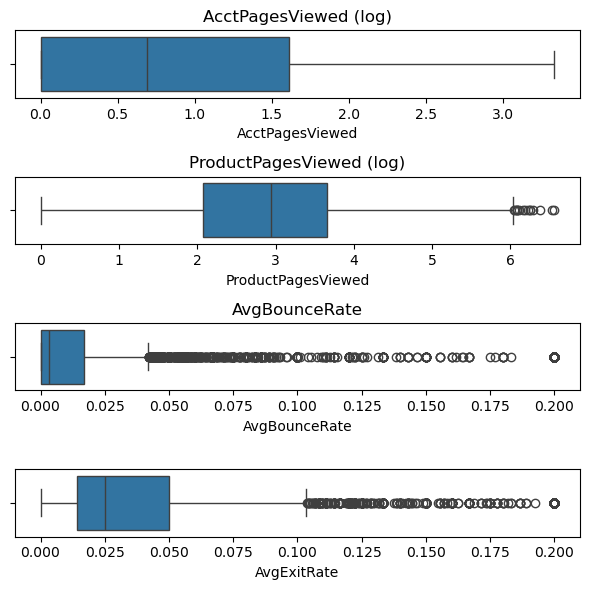

In [528]:
# The outliers are highly skewed so I am using the Log Scaling method to see the outliers more carefully

fig, axis = plt.subplots(4, figsize=(6, 6))

sns.boxplot(x=np.log1p(data['AcctPagesViewed']), ax=axis[0], orient='h').set_title("AcctPagesViewed (log)")
sns.boxplot(x=np.log1p(data['ProductPagesViewed']), ax=axis[1], orient='h').set_title("ProductPagesViewed (log)")
sns.boxplot(x=(data['AvgBounceRate']), ax=axis[2], orient='h').set_title("AvgBounceRate")
sns.boxplot(x=data['AvgExitRate'],ax=axis[3], orient='h')

plt.tight_layout()


In [529]:
behavorial_features

['AcctPagesViewed',
 'AcctPageTime',
 'InfoPagesViewed',
 'InfoPageTime',
 'ProductPagesViewed',
 'ProductPageTime',
 'AvgBounceRate',
 'AvgExitRate',
 'AvgPageValue',
 'ProximityToSpecialDay',
 'VisitMonth']

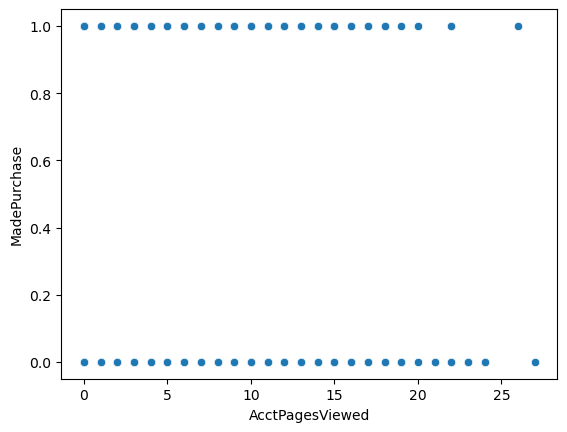

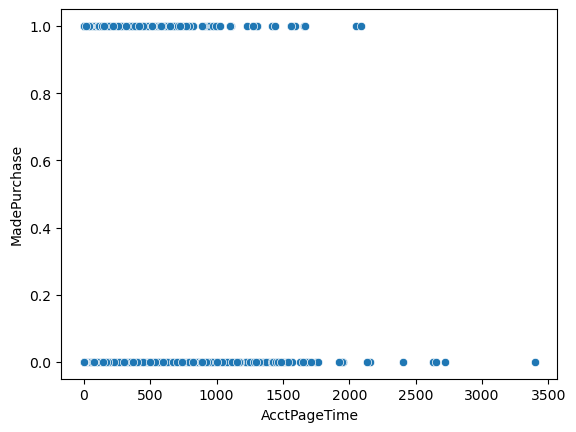

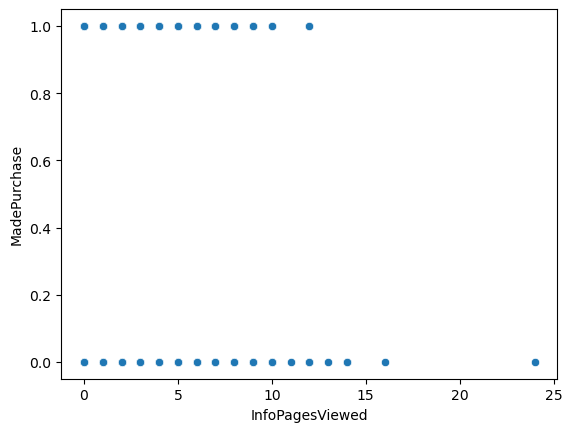

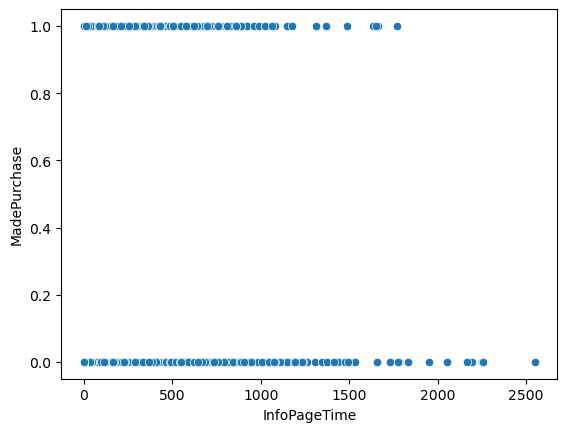

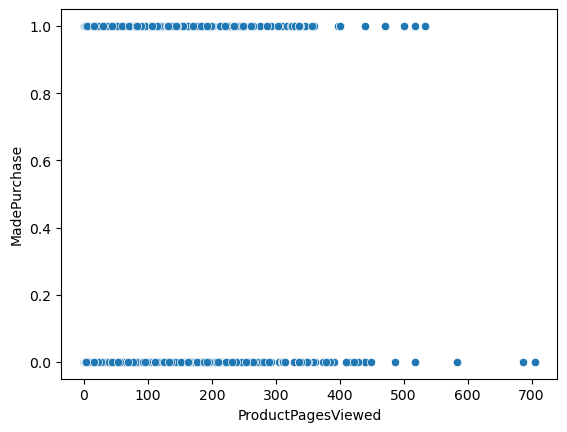

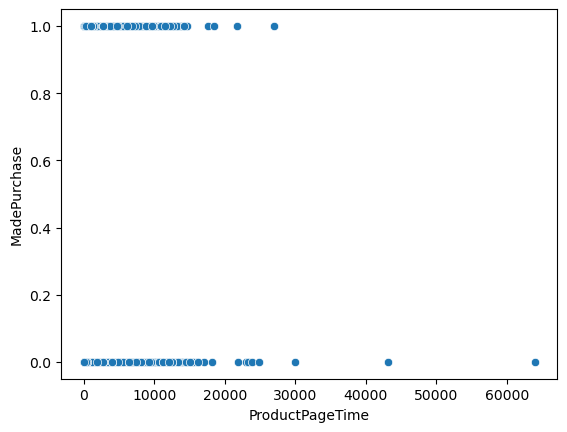

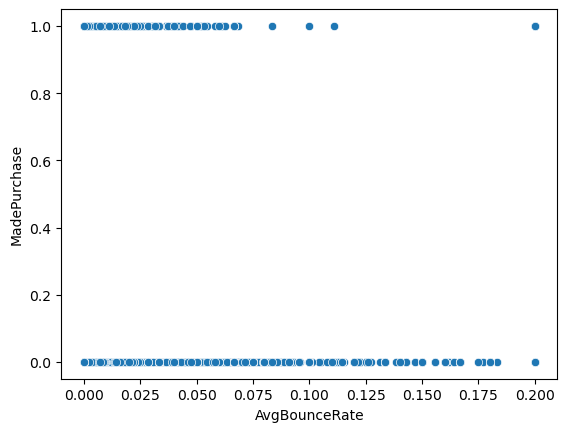

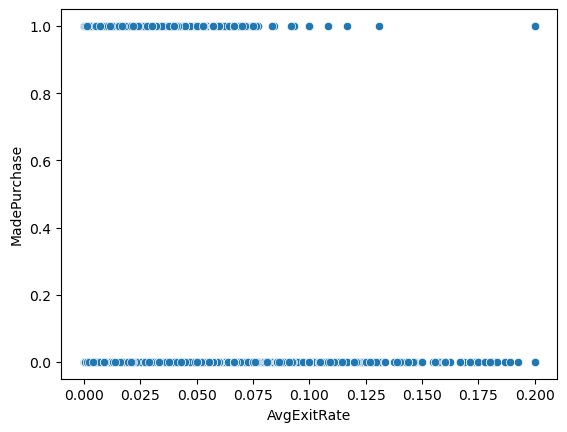

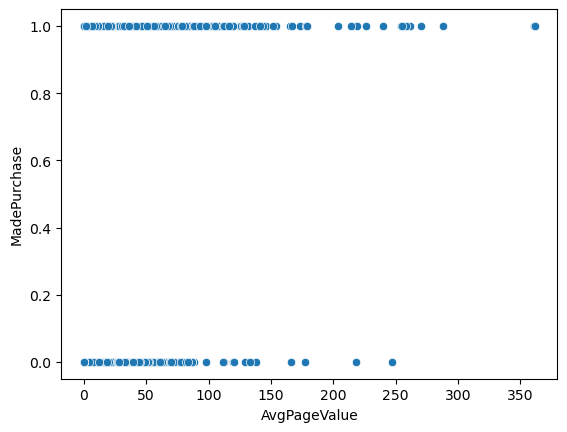

In [530]:
for i in ['AcctPagesViewed','AcctPageTime','InfoPagesViewed','InfoPageTime','ProductPagesViewed','ProductPageTime','AvgBounceRate','AvgExitRate','AvgPageValue']:
   sns.scatterplot(x= i, y='MadePurchase', data=data)
   plt.show()

In [531]:
data_pp = data.copy()

# For MadePurchase = 1 treating the values above 390 with the next maximum value considering next upcoming value below 390 as max
maxi = data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['ProductPagesViewed'] <= 390), 'ProductPagesViewed'].max()
data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['ProductPagesViewed'] > 390), 'ProductPagesViewed'] = maxi
# For MadePurchase = 0 treating the values above 400 with the next maximum value considering next upcoming value below 400 as max
maxi = data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['ProductPagesViewed'] <= 400), 'ProductPagesViewed'].max()
data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['ProductPagesViewed'] > 400), 'ProductPagesViewed'] = maxi



In [532]:
# For MadePurchase = 1 treating the values above 21 with the next maximum value considering next upcoming value below 21 as max
maxi = data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['AcctPagesViewed'] <= 21), 'AcctPagesViewed'].max()
data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['AcctPagesViewed'] > 21), 'AcctPagesViewed'] = maxi
# For MadePurchase = 0 treating the values above 25 with the next maximum value considering next upcoming value below 25 as max
maxi = data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['AcctPagesViewed'] <= 25), 'AcctPagesViewed'].max()
data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['AcctPagesViewed'] > 25), 'AcctPagesViewed'] = maxi

In [533]:
# For MadePurchase = 1 treating the values above 1200 with the next maximum value considering next upcoming value below 1200 as max
maxi = data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['AcctPageTime'] <= 800), 'AcctPageTime'].max()
data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['AcctPageTime'] > 800), 'AcctPageTime'] = maxi
# For MadePurchase = 0 treating the values above 1800 with the next maximum value considering next upcoming value below 1800 as max
maxi = data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['AcctPageTime'] <= 1600), 'AcctPageTime'].max()
data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['AcctPageTime'] > 1600), 'AcctPageTime'] = maxi

In [534]:
# For MadePurchase = 1 treating the values above 11 with the next maximum value considering next upcoming value below 11 as max
maxi = data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['InfoPagesViewed'] <= 11), 'InfoPagesViewed'].max()
data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['InfoPagesViewed'] > 11), 'InfoPagesViewed'] = maxi
# For MadePurchase = 0 treating the values above 15 with the next maximum value considering next upcoming value below 15 as max
maxi = data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['InfoPagesViewed'] <= 15), 'InfoPagesViewed'].max()
data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['InfoPagesViewed'] > 15), 'InfoPagesViewed'] = maxi

In [535]:
# For MadePurchase = 1 treating the values above 1100 with the next maximum value considering next upcoming value below 1100 as max
maxi = data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['InfoPageTime'] <= 1100), 'InfoPageTime'].max()
data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['InfoPageTime'] > 1100), 'InfoPageTime'] = maxi
# For MadePurchase = 0 treating the values above 1300 with the next maximum value considering next upcoming value below 1300 as max
maxi = data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['InfoPageTime'] <= 1300), 'InfoPageTime'].max()
data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['InfoPageTime'] > 1300), 'InfoPageTime'] = maxi

In [536]:
# For MadePurchase = 1 treating the values above 210 with the next maximum value considering next upcoming value below 210 as max
maxi = data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['ProductPagesViewed'] <= 210), 'ProductPagesViewed'].max()
data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['ProductPagesViewed'] > 210), 'ProductPagesViewed'] = maxi
# For MadePurchase = 0 treating the values above 300 with the next maximum value considering next upcoming value below 300 as max
maxi = data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['ProductPagesViewed'] <= 300), 'ProductPagesViewed'].max()
data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['ProductPagesViewed'] > 300), 'ProductPagesViewed'] = maxi

In [537]:
# For MadePurchase = 1 treating the values above 9000 with the next maximum value considering next upcoming value below 9000 as max
maxi = data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['ProductPageTime'] <= 9000), 'ProductPageTime'].max()
data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['ProductPageTime'] > 9000), 'ProductPageTime'] = maxi
# For MadePurchase = 0 treating the values above 10000 with the next maximum value considering next upcoming value below 10000 as max
maxi = data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['ProductPageTime'] <= 10000), 'ProductPageTime'].max()
data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['ProductPageTime'] > 10000), 'ProductPageTime'] = maxi

In [538]:
# For MadePurchase = 1 treating the values above 0.04 with the next maximum value considering next upcoming value below 0.04 as max
maxi = data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['AvgBounceRate'] <= 0.025), 'AvgBounceRate'].max()
data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['AvgBounceRate'] > 0.025), 'AvgBounceRate'] = maxi
# For MadePurchase = 0 treating the values above 0.06 with the next maximum value considering next upcoming value below 0.06 as max
maxi = data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['AvgBounceRate'] <= 0.04), 'AvgBounceRate'].max()
data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['AvgBounceRate'] > 0.04), 'AvgBounceRate'] = maxi



In [539]:
maxi = data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['AvgExitRate'] <= 0.199), 'AvgExitRate'].max()
data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['AvgExitRate'] > 0.199), 'AvgExitRate'] = maxi
maxi = data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['AvgExitRate'] <= 0.08), 'AvgExitRate'].max()
data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['AvgExitRate'] > 0.08), 'AvgExitRate'] = maxi

In [540]:
maxi = data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['AvgPageValue'] <= 120), 'AvgPageValue'].max()
data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['AvgPageValue'] > 120), 'AvgPageValue'] = maxi
maxi = data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['AvgPageValue'] <= 75), 'AvgPageValue'].max()
data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['AvgPageValue'] > 75), 'AvgPageValue'] = maxi

In [541]:
maxi = data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['ProductPageTime'] <= 12000), 'ProductPageTime'].max()
data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['ProductPageTime'] > 12000), 'ProductPageTime'] = maxi
maxi = data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['ProductPageTime'] <= 14000), 'ProductPageTime'].max()
data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['ProductPageTime'] > 14000), 'ProductPageTime'] = maxi

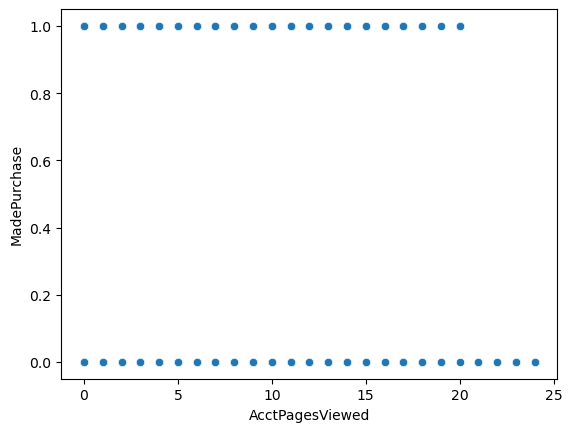

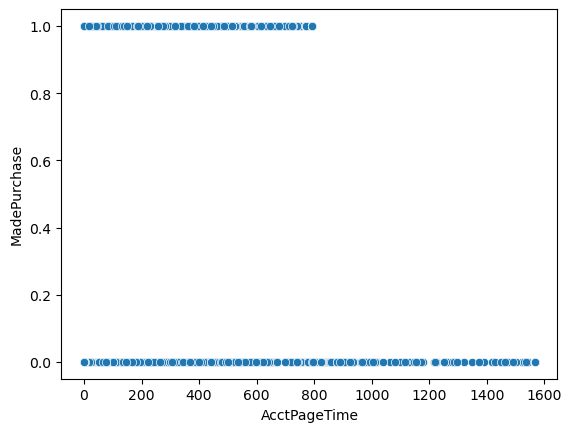

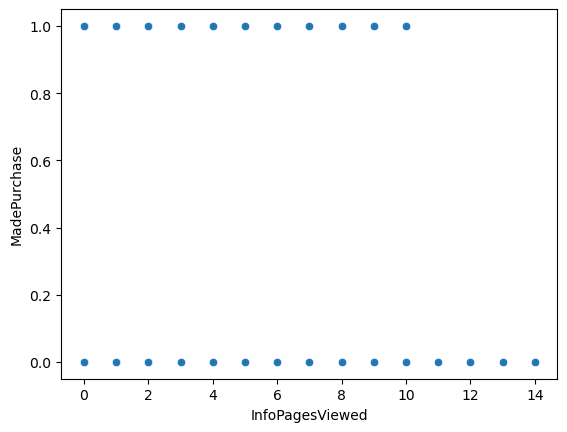

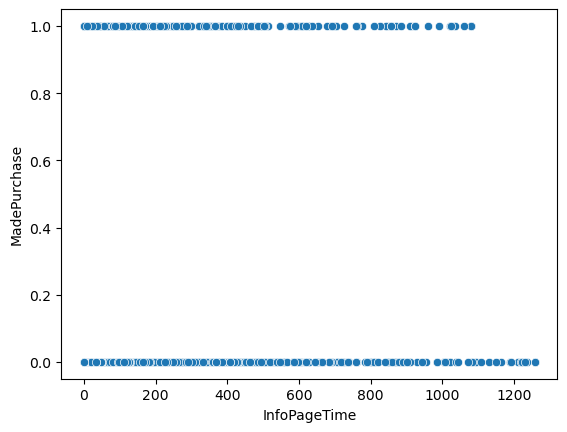

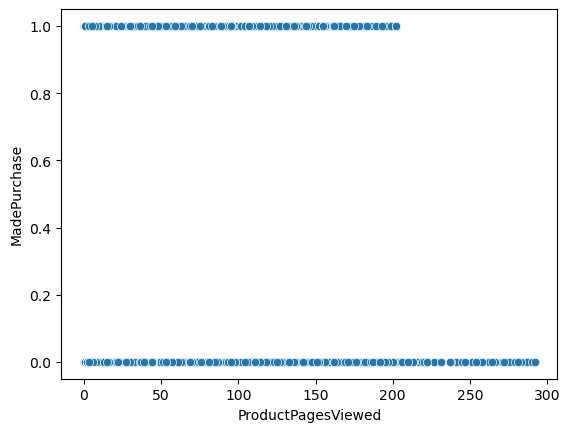

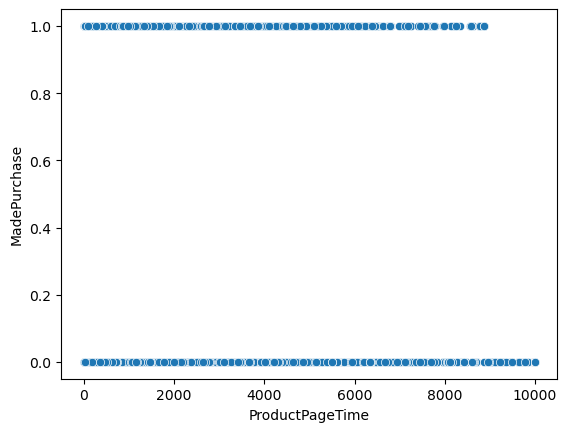

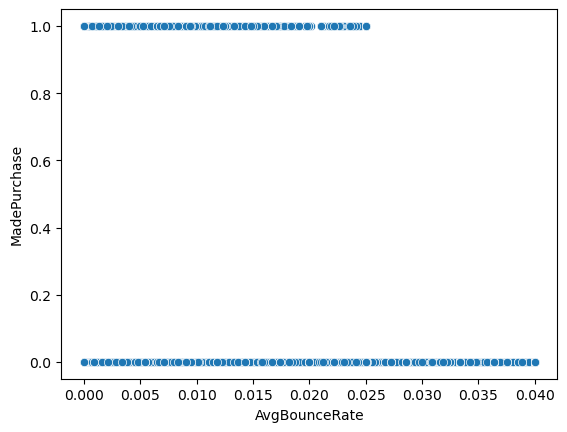

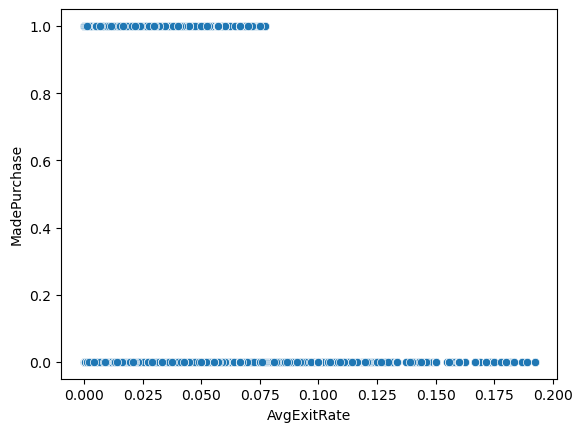

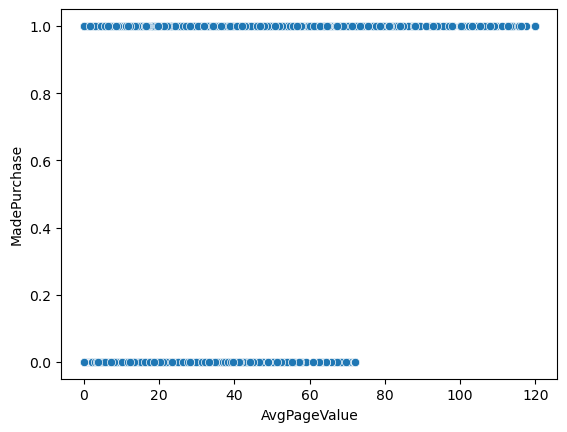

In [542]:
for i in ['AcctPagesViewed','AcctPageTime','InfoPagesViewed','InfoPageTime','ProductPagesViewed','ProductPageTime','AvgBounceRate','AvgExitRate','AvgPageValue']:
   sns.scatterplot(x= i, y='MadePurchase', data=data_pp)
   plt.show()

In [543]:
data.head()

,AcctPagesViewed,AcctPageTime,InfoPagesViewed,InfoPageTime,ProductPagesViewed,ProductPageTime,AvgBounceRate,AvgExitRate,AvgPageValue,ProximityToSpecialDay,VisitMonth,UserOS,UserBrowser,UserRegion,SourceChannel,UserCategory,IsWeekendVisit,MadePurchase
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


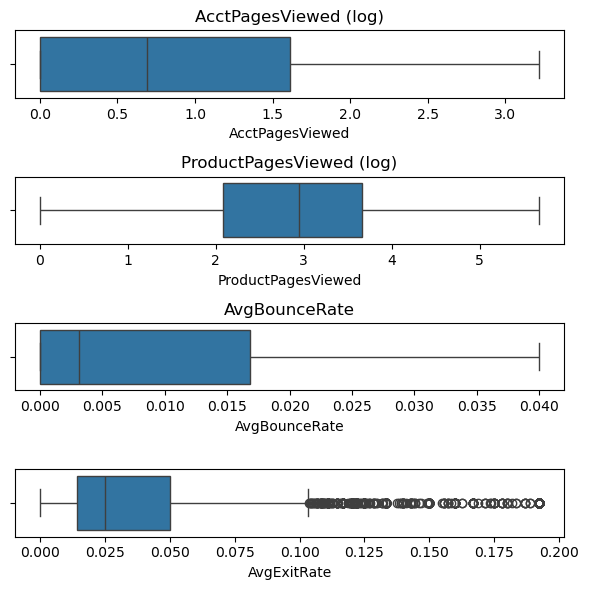

In [544]:
# The outliers are highly skewed so I am using the Log Scaling method to see the outliers more carefully

fig, axis = plt.subplots(4, figsize=(6, 6))

sns.boxplot(x=np.log1p(data_pp['AcctPagesViewed']), ax=axis[0], orient='h').set_title("AcctPagesViewed (log)")
sns.boxplot(x=np.log1p(data_pp['ProductPagesViewed']), ax=axis[1], orient='h').set_title("ProductPagesViewed (log)")
sns.boxplot(x=(data_pp['AvgBounceRate']), ax=axis[2], orient='h').set_title("AvgBounceRate")
sns.boxplot(x=data_pp['AvgExitRate'],ax=axis[3], orient='h')

plt.tight_layout()


In [545]:
maxi = data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['AvgExitRate'] <= 0.100), 'AvgExitRate'].max()
data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['AvgExitRate'] > 0.100), 'AvgExitRate'] = maxi

In [546]:
corre = data_pp[['AvgPageValue','MadePurchase']].corr()
print(corre)
corrr = data[['AvgPageValue','MadePurchase']].corr()
print(corrr)

              AvgPageValue  MadePurchase
AvgPageValue       1.00000       0.54802
MadePurchase       0.54802       1.00000
              AvgPageValue  MadePurchase
AvgPageValue      1.000000      0.492569
MadePurchase      0.492569      1.000000


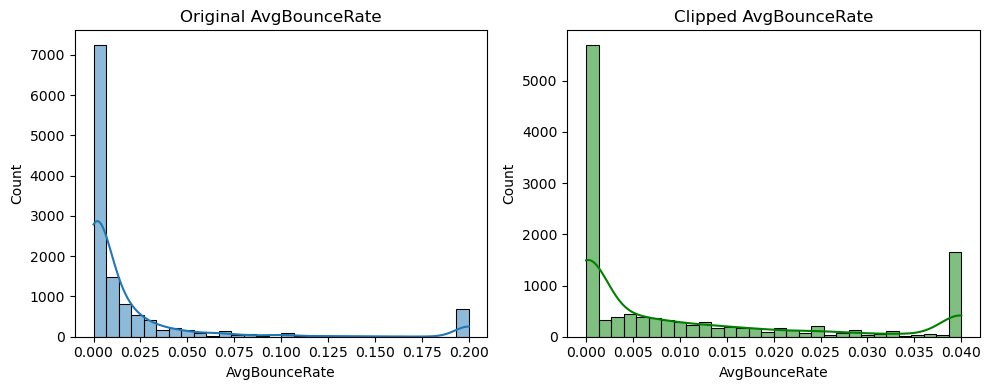

In [547]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(data['AvgBounceRate'], bins=30, kde=True)
plt.title("Original AvgBounceRate")

plt.subplot(1, 2, 2)
sns.histplot(data_pp['AvgBounceRate'], bins=30, kde=True, color='green')
plt.title("Clipped AvgBounceRate")

plt.tight_layout()
plt.show()


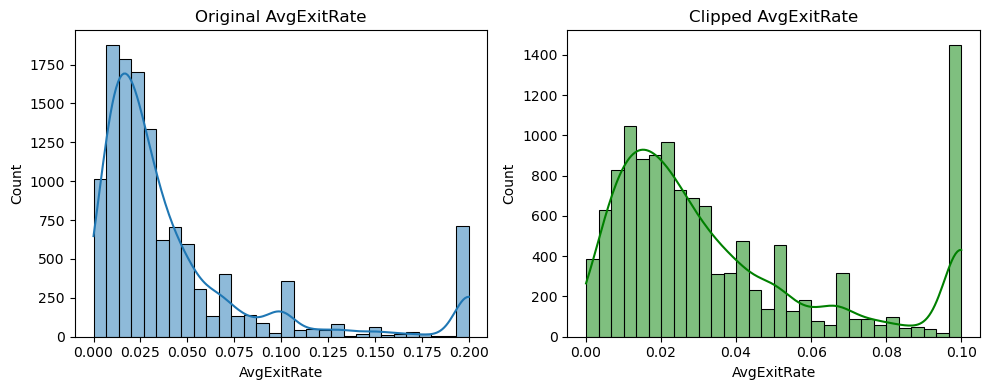

In [548]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(data['AvgExitRate'], bins=30, kde=True)
plt.title("Original AvgExitRate")

plt.subplot(1, 2, 2)
sns.histplot(data_pp['AvgExitRate'], bins=30, kde=True, color='green')
plt.title("Clipped AvgExitRate")

plt.tight_layout()
plt.show()


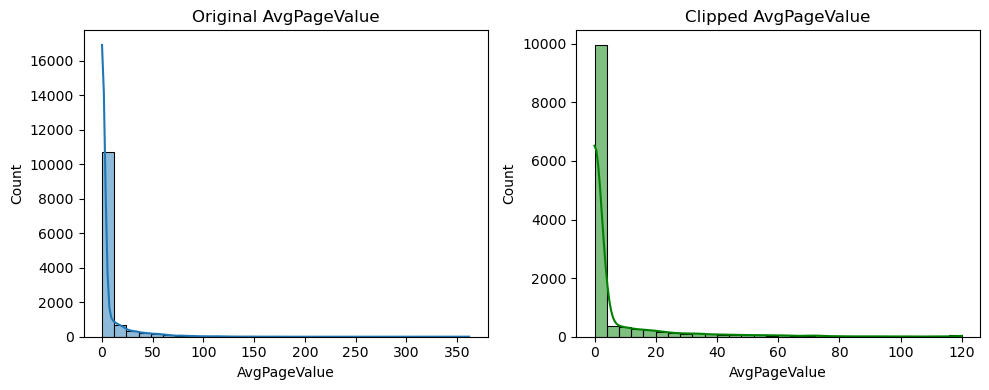

In [549]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.histplot(data['AvgPageValue'], bins=30, kde=True)
plt.title("Original AvgPageValue")

plt.subplot(1, 2, 2)
sns.histplot(data_pp['AvgPageValue'], bins=30, kde=True, color='green')
plt.title("Clipped AvgPageValue")

plt.tight_layout()
plt.show()


<Axes: xlabel='InfoPagesViewed', ylabel='MadePurchase'>

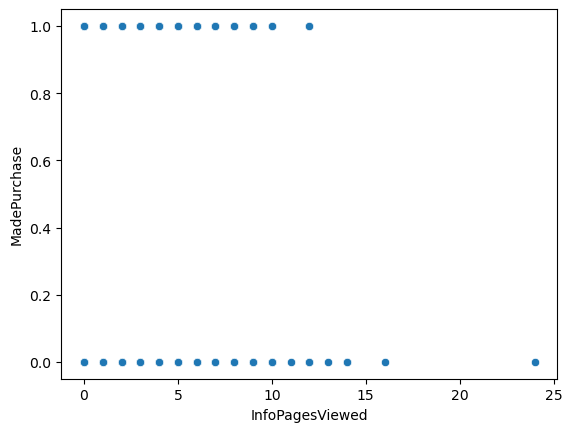

In [550]:
sns.scatterplot(x='InfoPagesViewed', y='MadePurchase', data=data)

In [551]:
# For MadePurchase = 0
maxi = data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['InfoPagesViewed'] <= 15), 'InfoPagesViewed'].max()
data_pp.loc[(data_pp['MadePurchase'] == 0) & (data_pp['InfoPagesViewed'] > 15), 'InfoPagesViewed'] = maxi


In [552]:
# For MadePurchase = 0
maxi = data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['InfoPagesViewed'] <= 11), 'InfoPagesViewed'].max()
data_pp.loc[(data_pp['MadePurchase'] == 1) & (data_pp['InfoPagesViewed'] > 11), 'InfoPagesViewed'] = maxi

<Axes: xlabel='InfoPagesViewed', ylabel='MadePurchase'>

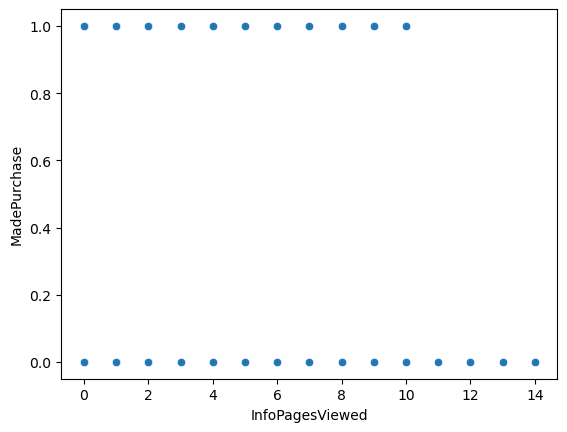

In [553]:
sns.scatterplot(x='InfoPagesViewed', y='MadePurchase', data=data_pp)

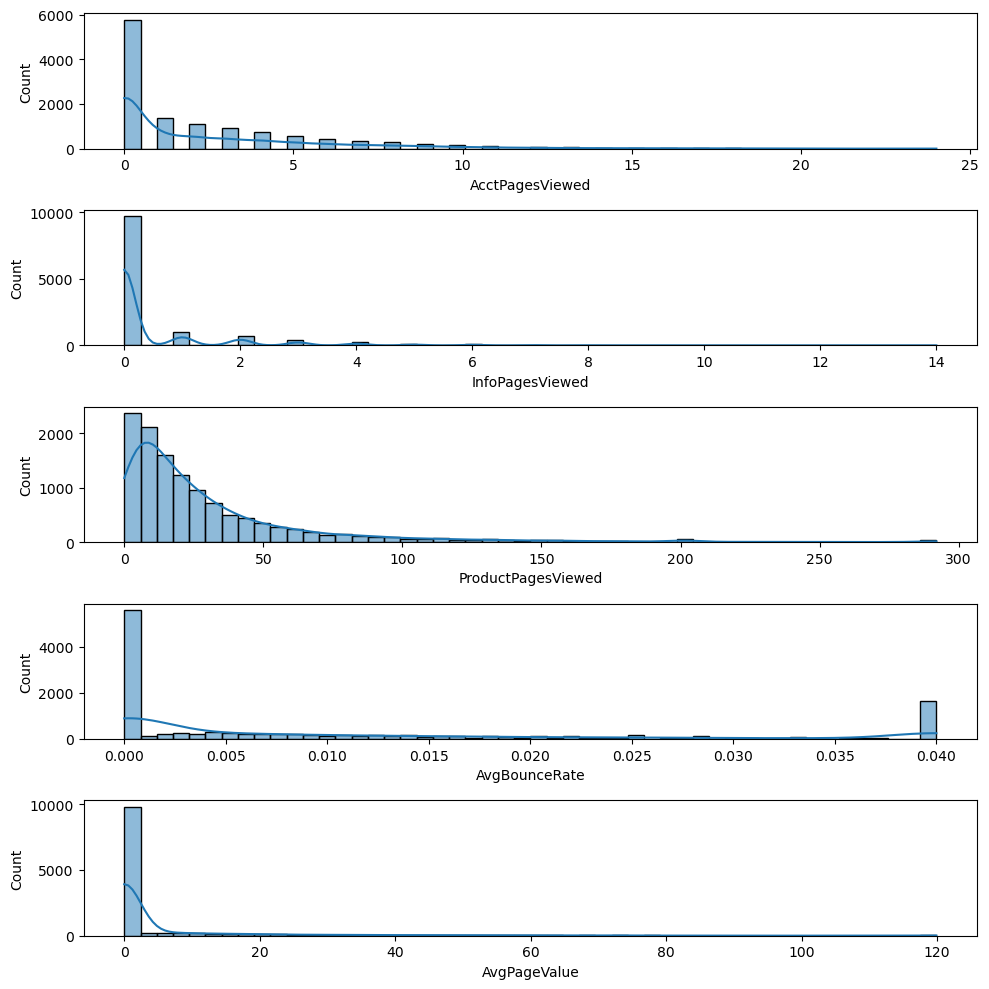

In [554]:
fig, axis = plt.subplots(5, figsize=(10, 10))

sns.histplot(data_pp['AcctPagesViewed'], bins=50, ax=axis[0], kde=True)
sns.histplot(data_pp['InfoPagesViewed'], bins=50, ax=axis[1], kde=True)
sns.histplot(data_pp['ProductPagesViewed'], bins=50, ax=axis[2], kde=True)
sns.histplot(data_pp['AvgBounceRate'], bins=50, ax=axis[3], kde=True)
sns.histplot(data_pp['AvgPageValue'], bins=50, ax=axis[4], kde=True)
plt.tight_layout()


- In the above boxplot there are huge number of outliers and these should be analysed 

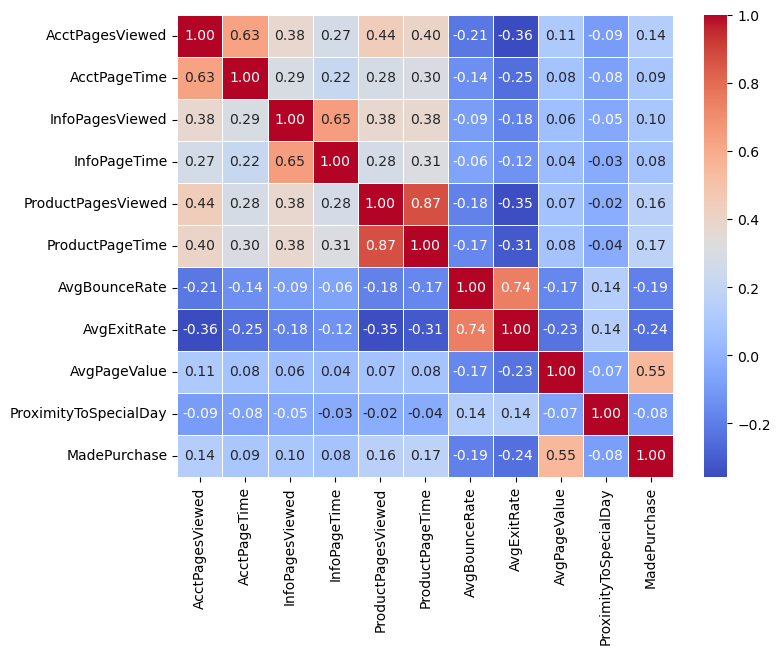

MadePurchase
0    10422
1     1908
Name: count, dtype: int64

In [555]:
corr = data_pp[behavorial_features+target_feature].corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.show()
data_pp['MadePurchase'].value_counts()

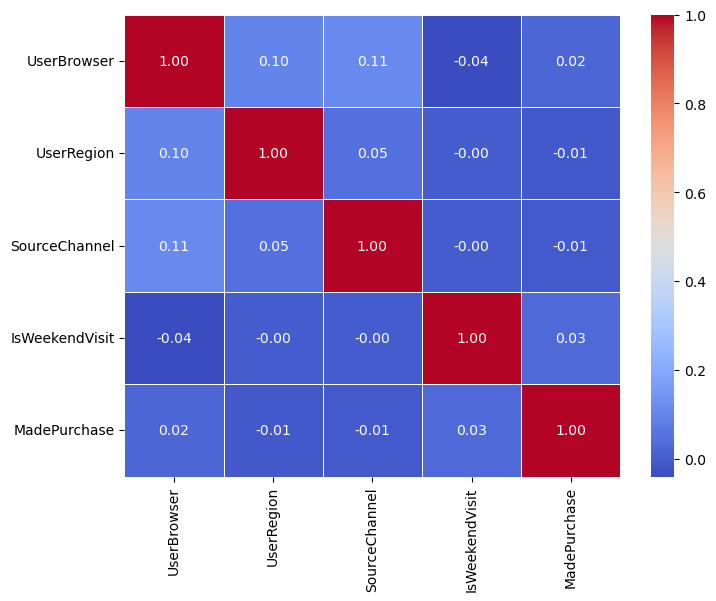

In [556]:
corr = data_pp[user_demographic_features+target_feature].corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.show()

## Feature Engineering

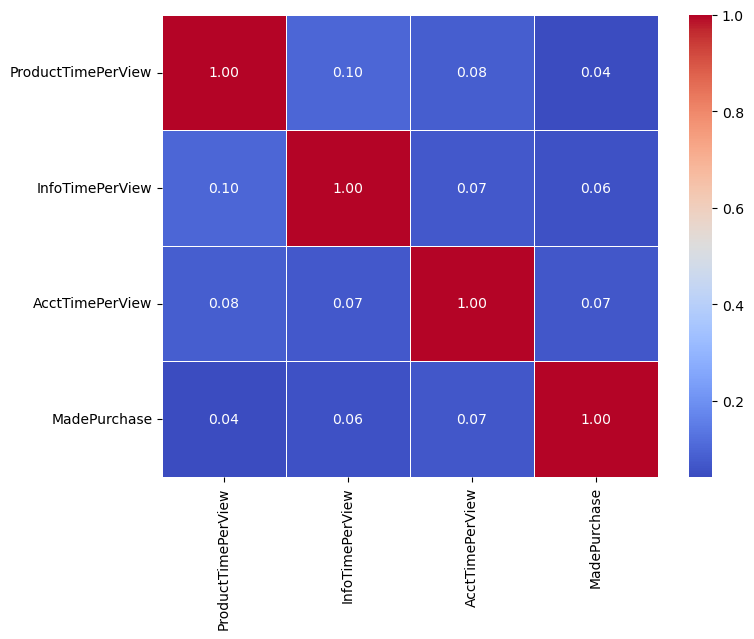

In [557]:
data_pp['ProductTimePerView'] = data_pp['ProductPageTime'] / (data_pp['ProductPagesViewed'] + 1e-5)
data_pp['InfoTimePerView'] = data_pp['InfoPageTime'] / (data_pp['InfoPagesViewed'] + 1e-5)
data_pp['AcctTimePerView'] = data_pp['AcctPageTime'] / (data_pp['AcctPagesViewed'] + 1e-5)


corr = data_pp[['ProductTimePerView','InfoTimePerView','AcctTimePerView']+target_feature].corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.show()



In [558]:
data_pp.isnull().sum()

AcctPagesViewed          0
AcctPageTime             0
InfoPagesViewed          0
InfoPageTime             0
ProductPagesViewed       0
ProductPageTime          0
AvgBounceRate            0
AvgExitRate              0
AvgPageValue             0
ProximityToSpecialDay    0
VisitMonth               0
UserOS                   0
UserBrowser              0
UserRegion               0
SourceChannel            0
UserCategory             0
IsWeekendVisit           0
MadePurchase             0
ProductTimePerView       0
InfoTimePerView          0
AcctTimePerView          0
dtype: int64

In [559]:
data_pp.head()

,AcctPagesViewed,AcctPageTime,InfoPagesViewed,InfoPageTime,ProductPagesViewed,ProductPageTime,AvgBounceRate,AvgExitRate,AvgPageValue,ProximityToSpecialDay,VisitMonth,UserOS,UserBrowser,UserRegion,SourceChannel,UserCategory,IsWeekendVisit,MadePurchase,ProductTimePerView,InfoTimePerView,AcctTimePerView
0,0,0.0,0,0.0,1,0.000000,0.04,0.10,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0,0.000000,0.0,0.0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0,31.999840,0.0,0.0
2,0,0.0,0,0.0,1,0.000000,0.04,0.10,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0,0.000000,0.0,0.0
3,0,0.0,0,0.0,2,2.666667,0.04,0.10,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0,1.333327,0.0,0.0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0,62.749937,0.0,0.0


## Scaling and Label Encoding of Features

In [560]:
numeric_columns = ['AvgBounceRate','AvgExitRate','AvgPageValue','ProductPageTime','InfoPageTime','AcctPageTime']

scaler = MinMaxScaler()

scaled_data= data_pp.copy()
scaled_data[numeric_columns] = scaler.fit_transform(scaled_data[numeric_columns])

In [561]:
from sklearn.preprocessing import LabelEncoder
cols = ['UserCategory','VisitMonth']

le = LabelEncoder()
for i in cols:
    scaled_data[i] = le.fit_transform(scaled_data[i])

## Analyzing the features probability density wrt to Target Feature after Scaling and Encoding (Feature Importance)

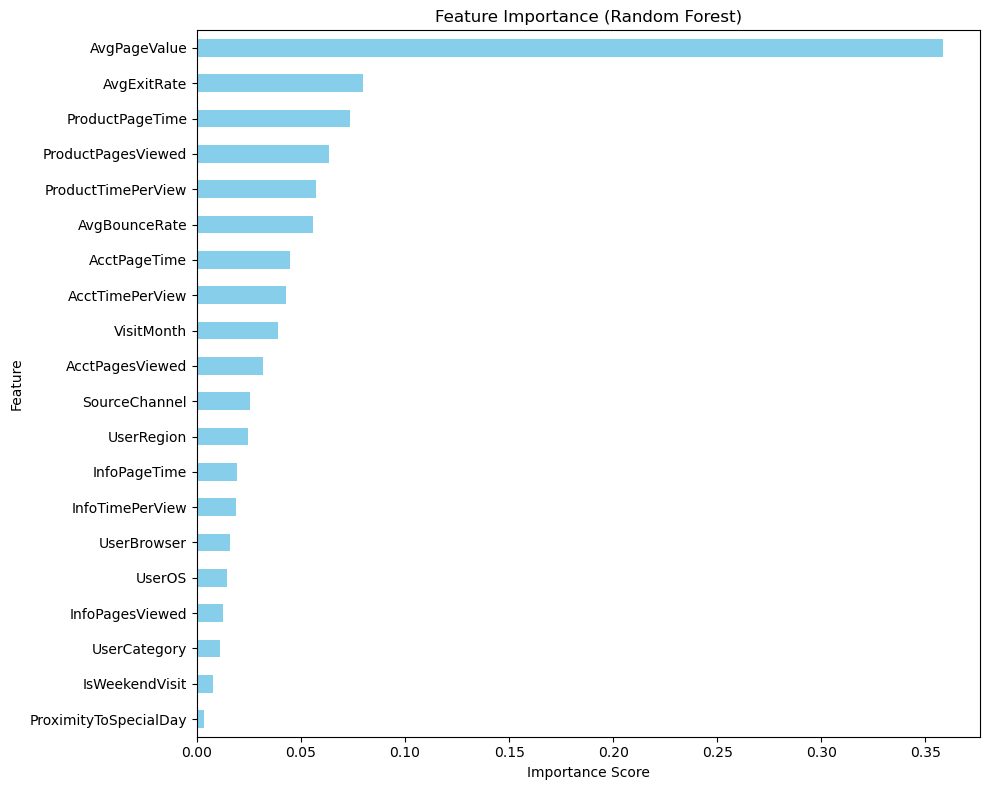

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = scaled_data.drop(columns=['MadePurchase'])
y = scaled_data['MadePurchase'].astype(int) 


X_encoded = X.copy()

model = RandomForestClassifier(random_state=42)
model.fit(X_encoded, y)

importances = pd.Series(model.feature_importances_, index=X_encoded.columns)
importances = importances.sort_values(ascending=True)

plt.figure(figsize=(10, 8))
importances.plot(kind='barh', color='skyblue')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


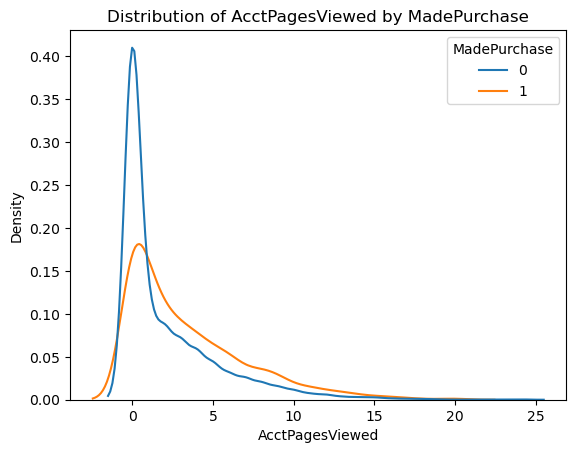

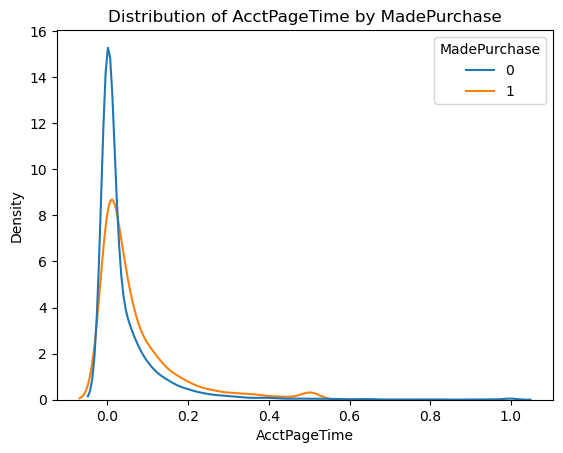

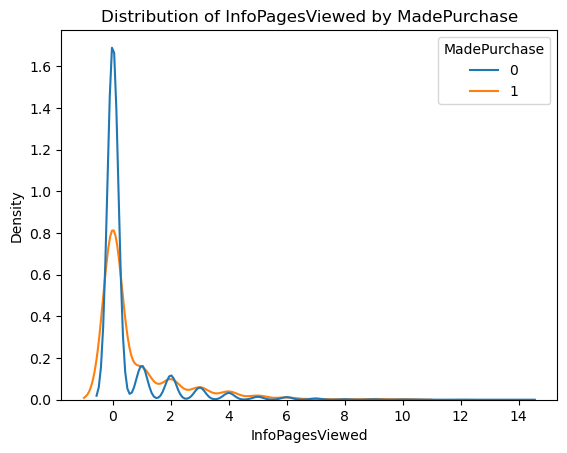

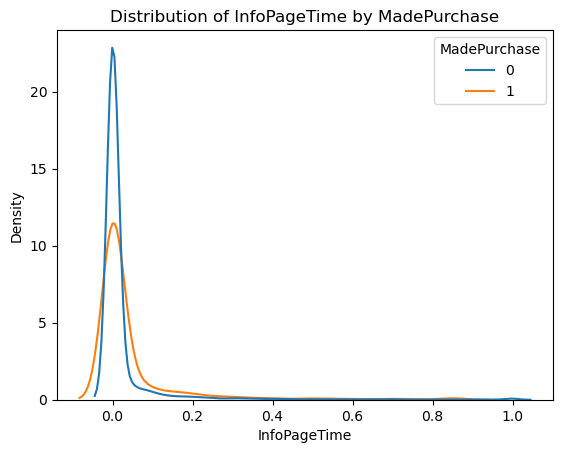

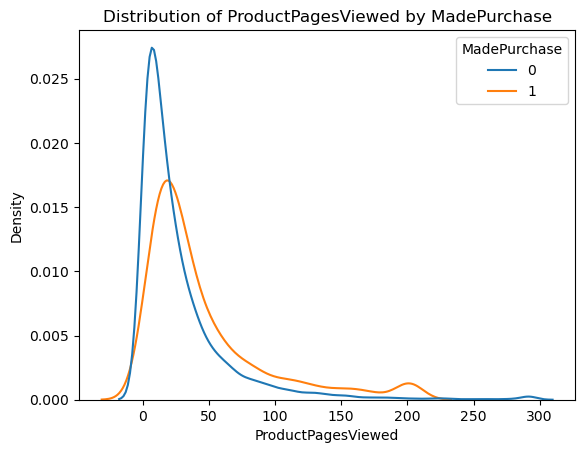

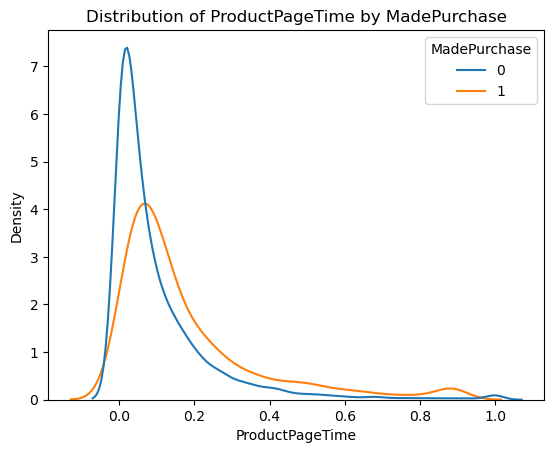

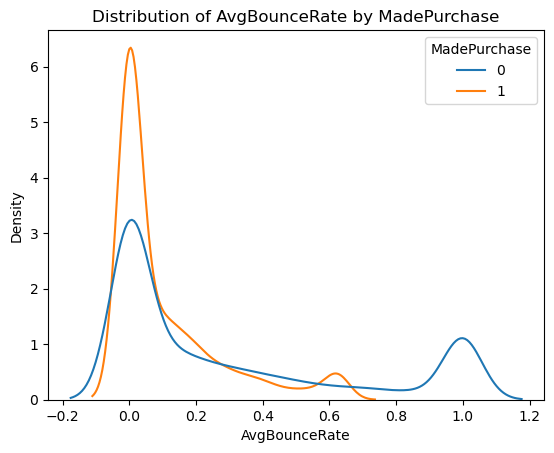

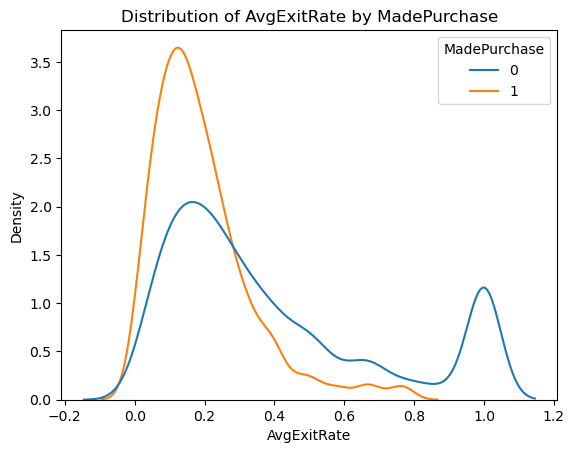

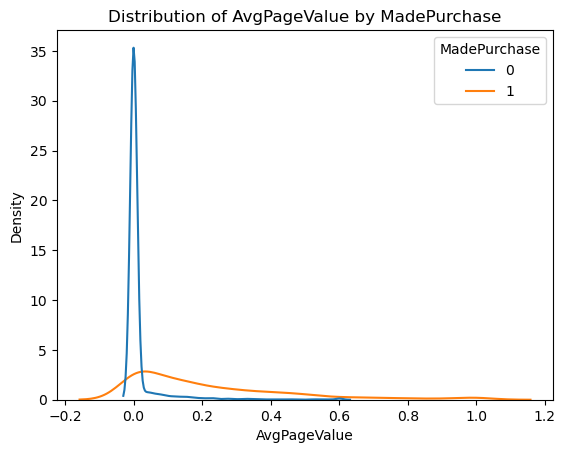

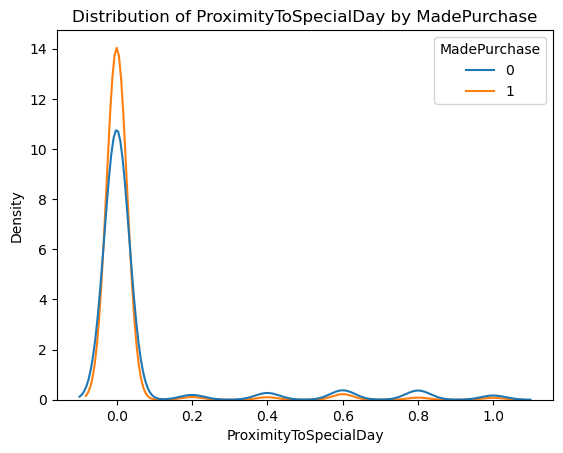

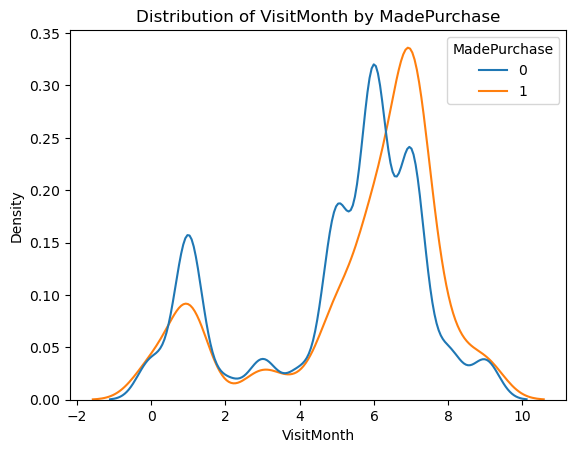

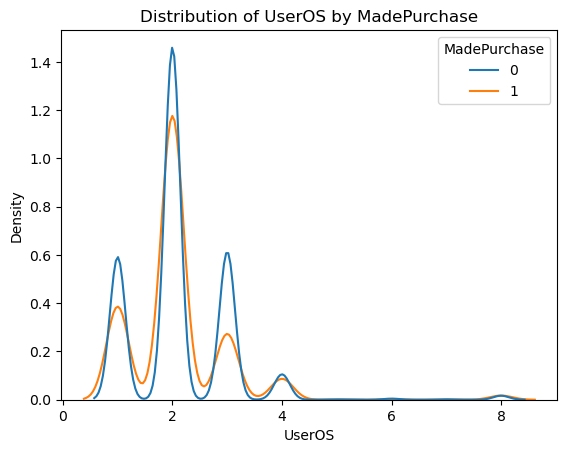

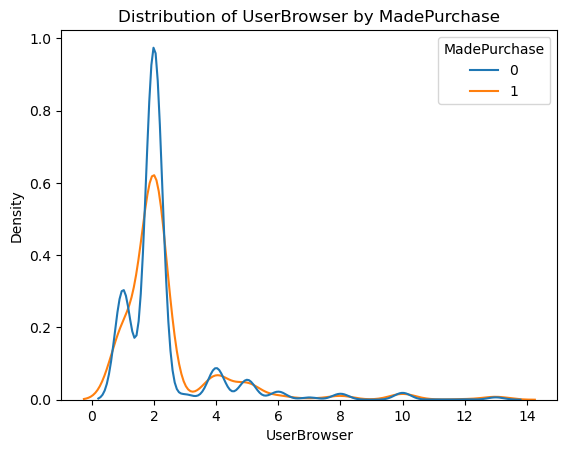

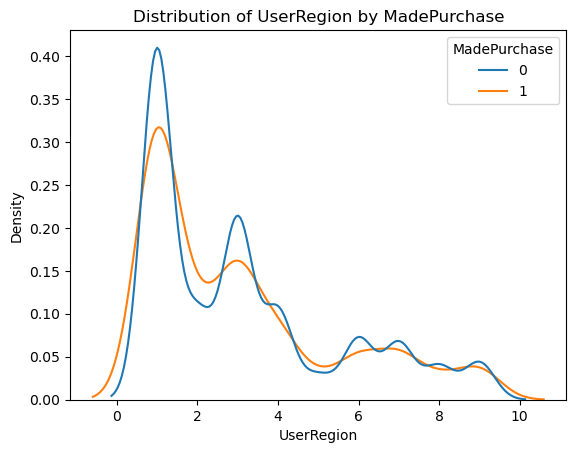

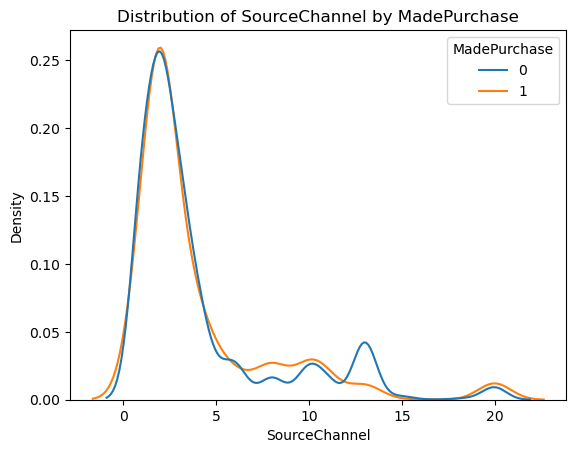

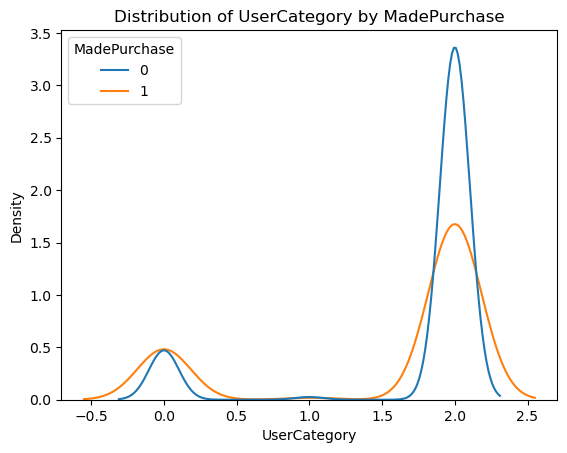

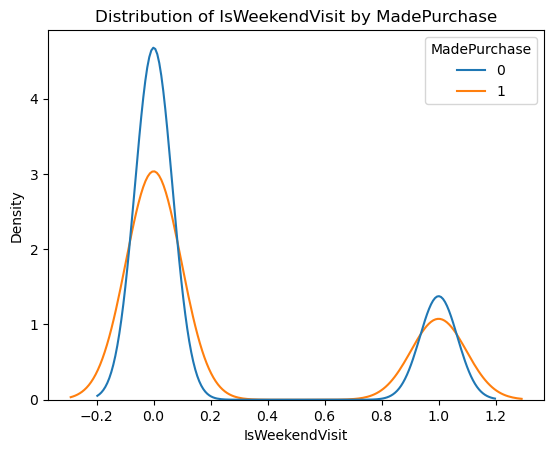

In [ ]:
for col in scaled_data.drop(columns=['AcctTimePerView','InfoTimePerView','ProductTimePerView','MadePurchase']).columns:
    sns.kdeplot(data=scaled_data, x=col, hue='MadePurchase', common_norm=False)
    plt.title(f'Distribution of {col} by MadePurchase')
    plt.show()


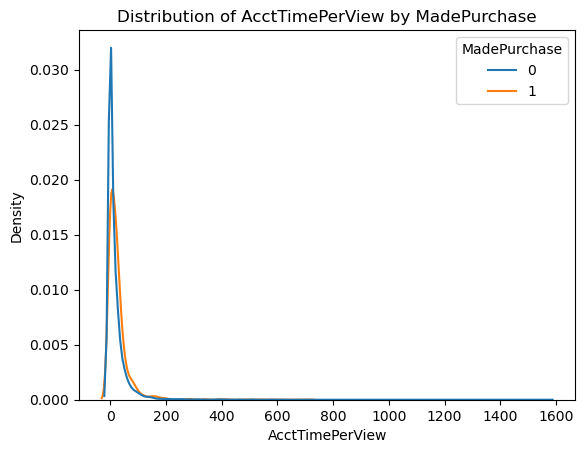

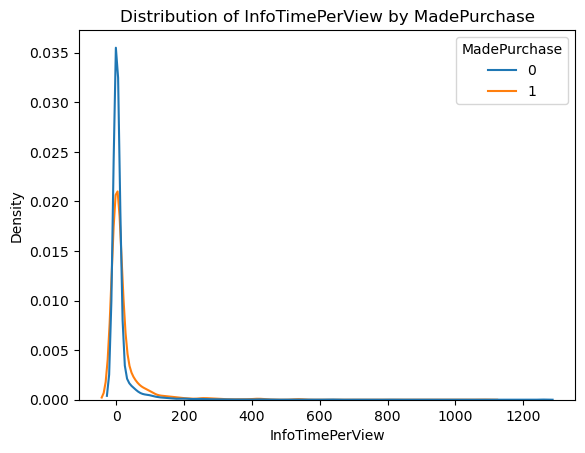

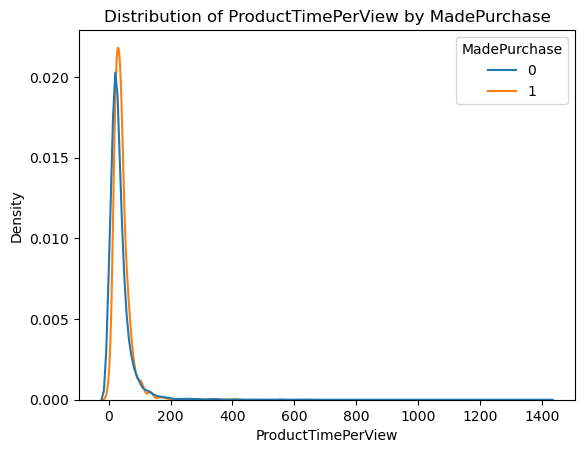

In [ ]:
#KDE plots for the features which were created by me
for col in scaled_data[['AcctTimePerView','InfoTimePerView','ProductTimePerView']].columns:
    sns.kdeplot(scaled_data, x=col, hue='MadePurchase', common_norm=False)
    plt.title(f'Distribution of {col} by MadePurchase')
    plt.show()


## Train test split (Random Sampling of train and test data)

In [ ]:
X = scaled_data[['InfoPagesViewed','ProductPageTime','AvgBounceRate','AvgExitRate','AvgPageValue','ProximityToSpecialDay','VisitMonth','ProductTimePerView','InfoTimePerView','AcctTimePerView']]
y = scaled_data[['MadePurchase']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
print("Train Data: ",X_train.shape,y_train.shape)
print("Test Data: ",X_test.shape,y_test.shape)
print("Train data value count:\n",y_train.value_counts())
print("Test data value count:\n",y_test.value_counts())



Train Data:  (9864, 10) (9864, 1)
Test Data:  (2466, 10) (2466, 1)
Train data value count:
 MadePurchase
0               8338
1               1526
Name: count, dtype: int64
Test data value count:
 MadePurchase
0               2084
1                382
Name: count, dtype: int64


## Model training and evaluation of models

Logistic Regression: Accuracy = 0.8820


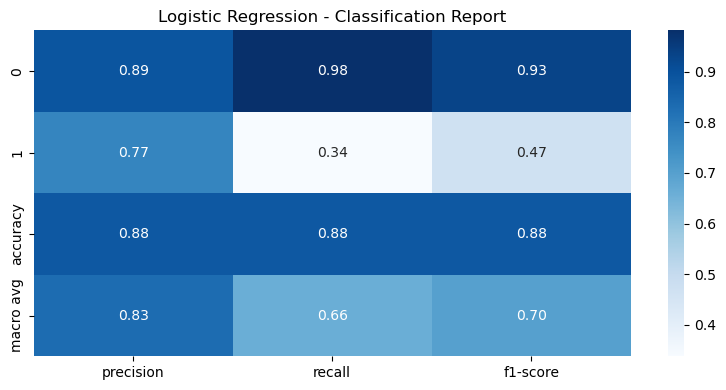

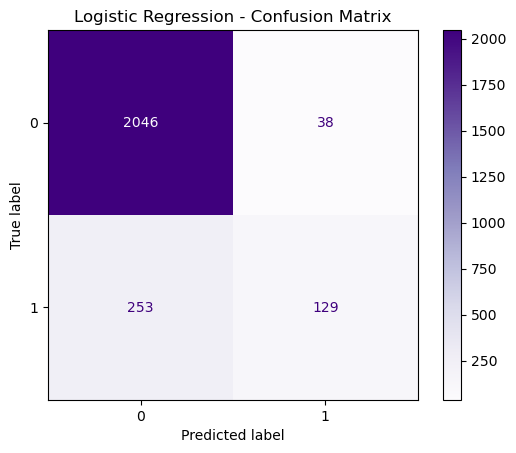

Random Forest: Accuracy = 0.9039


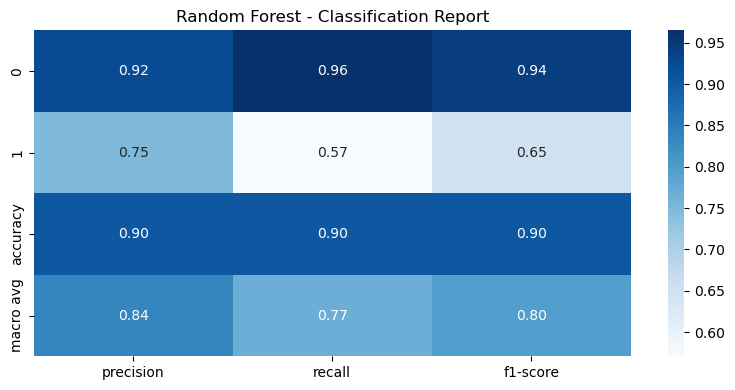

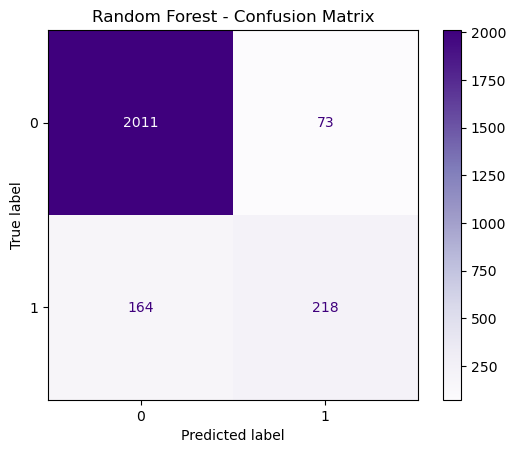

Gradient Boosting: Accuracy = 0.9120


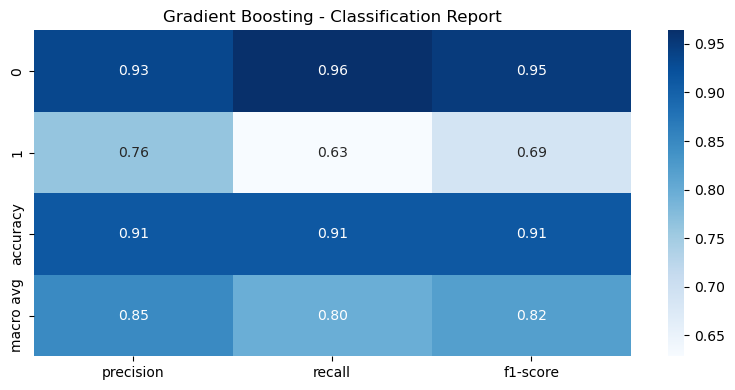

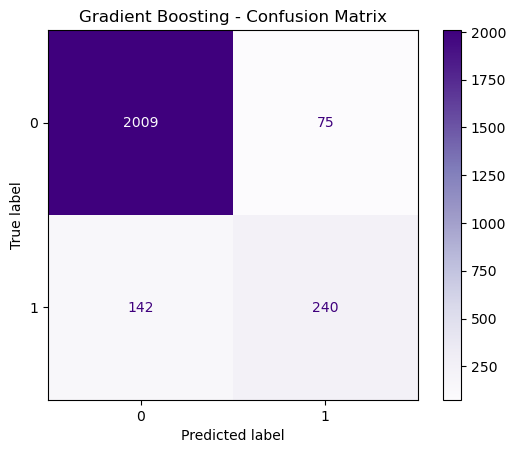

Decision Tree: Accuracy = 0.8662


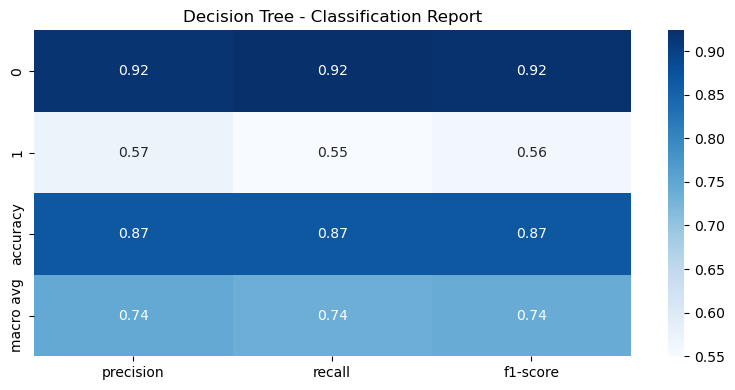

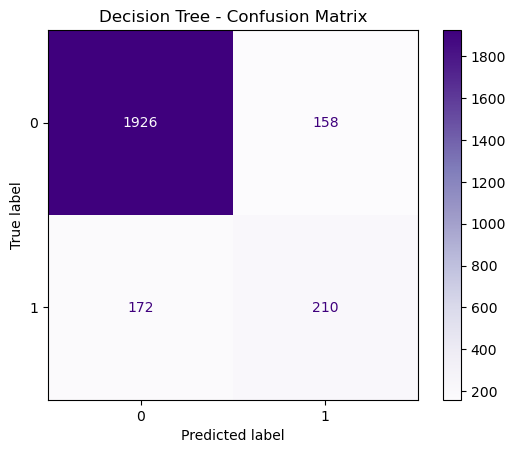

XGBoost: Accuracy = 0.9006


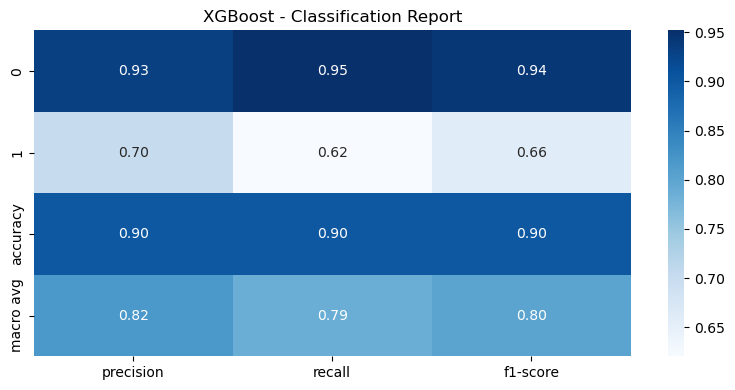

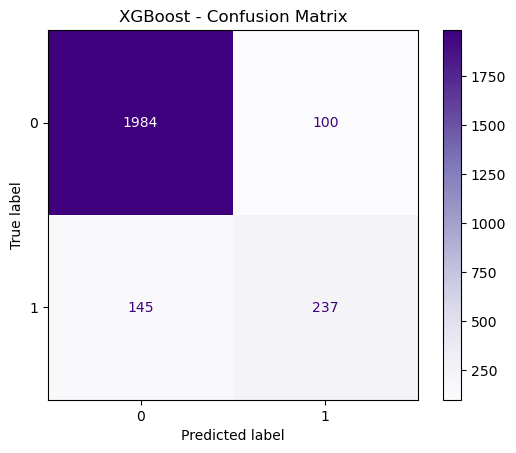

AdaBoost: Accuracy = 0.9006


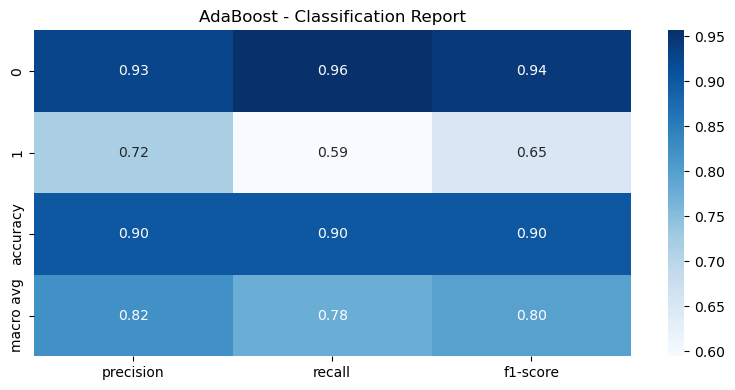

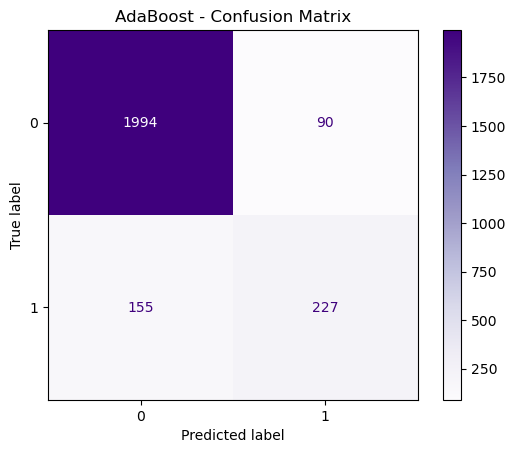

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from xgboost import XGBClassifier

# Define all classifiers in a dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "XGBoost": XGBClassifier(),
    "AdaBoost" : AdaBoostClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")
    report = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

    # Plot Classification Report
    plt.figure(figsize=(8, 4))
    sns.heatmap(report.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")
    plt.title(f"{name} - Classification Report")
    plt.tight_layout()
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Purples')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


- From the above samples we can see that the value counts of MadePurchase in Train and test samples are 

1. Train Data:  (9864, 10) (9864, 1)
2. Test Data:  (2466, 10) (2466, 1)

1. Train data value count:
- 0: 8338
- 1: 1526

2. Test data value count:
- 0: 2084
- 1: 382

- The ratio of class0 and class1 data we are using to train the model is very low therefore it is not performing well for class 1 as the number of training samples for class1 are very low when compared to class0

- Because of this I am going to use resampling method SMOTE

## Resampling using SMOTE

In [567]:

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_test_resampled,y_test_resampled = smote.fit_resample(X_test,y_test)
print("\nAfter resampling\n")

print("Train Data: ",X_resampled.shape,y_resampled.shape)
print("Test Data: ",X_test.shape,y_test.shape)
print("Train data value count:\n",y_resampled.value_counts())
print("Test data value count:\n",y_test_resampled.value_counts())


After resampling

Train Data:  (16676, 10) (16676, 1)
Test Data:  (2466, 10) (2466, 1)
Train data value count:
 MadePurchase
0               8338
1               8338
Name: count, dtype: int64
Test data value count:
 MadePurchase
0               2084
1               2084
Name: count, dtype: int64


## Model Training and Evaluation after Resampling

Logistic Regression: Accuracy = 0.8273


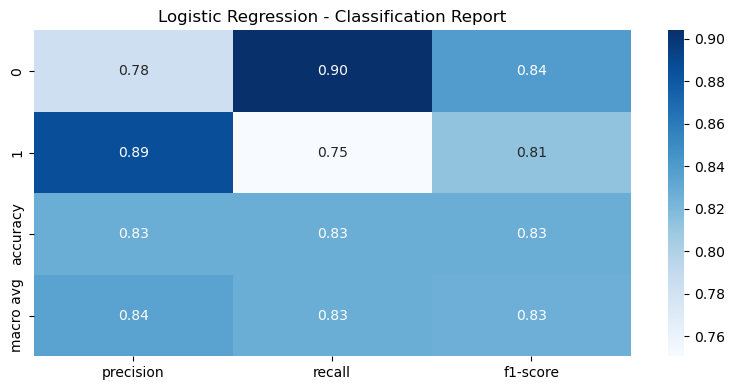

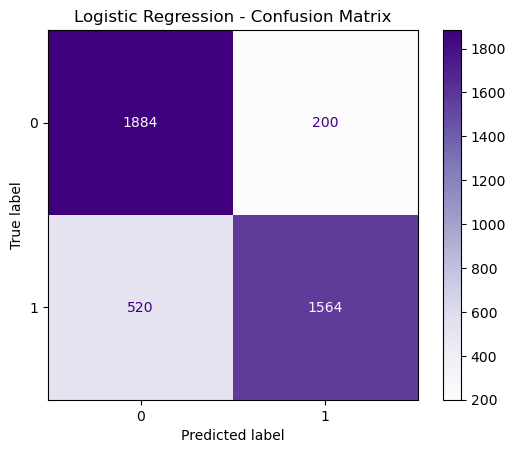

Random Forest: Accuracy = 0.9055


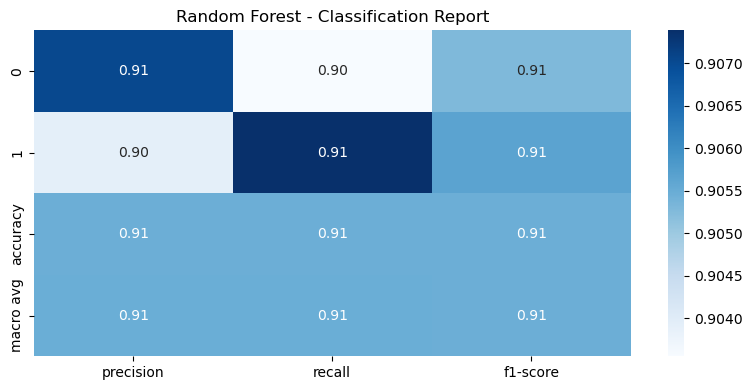

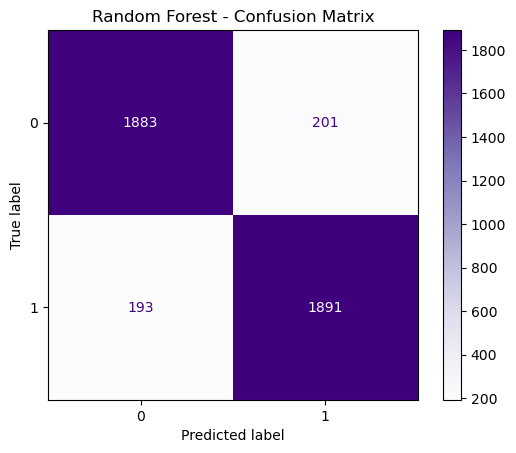

Gradient Boosting: Accuracy = 0.9048


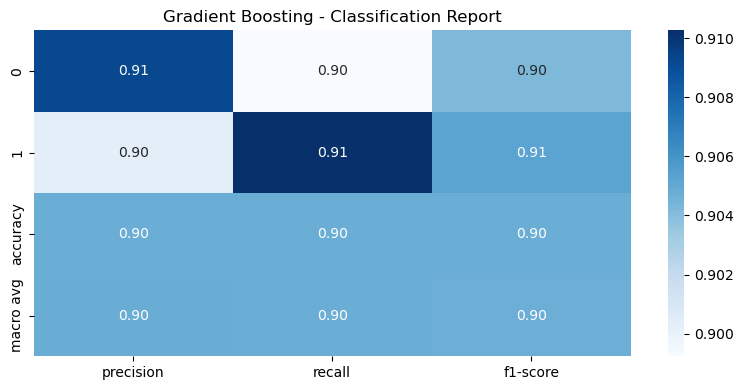

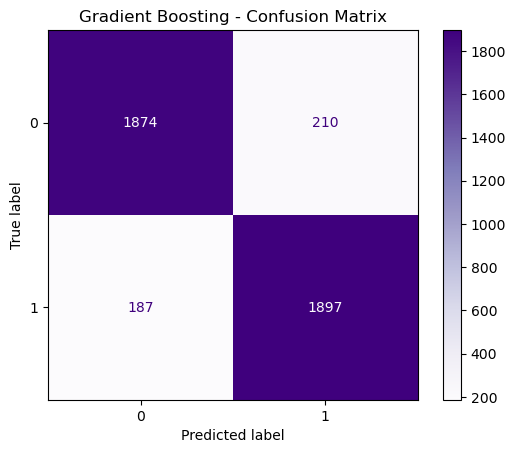

Decision Tree: Accuracy = 0.8402


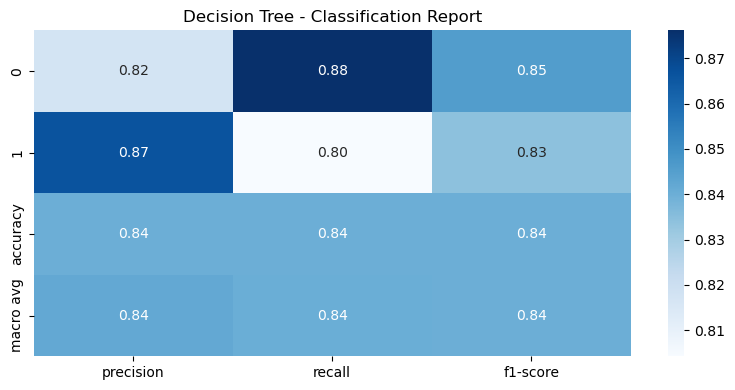

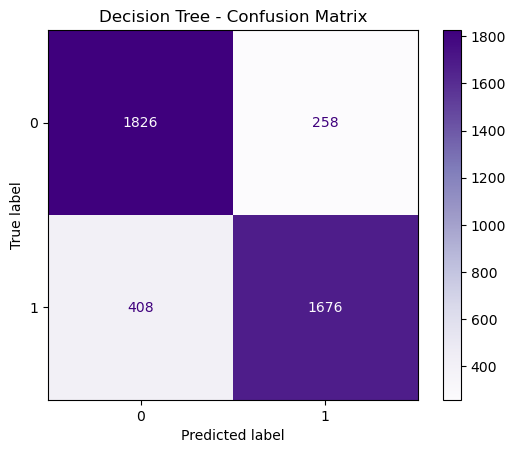

XGBoost: Accuracy = 0.9021


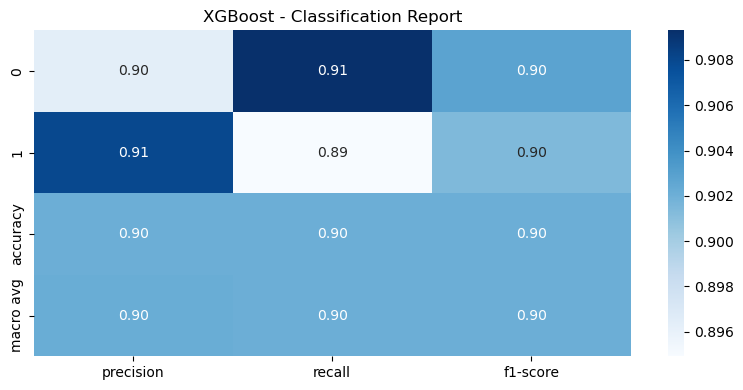

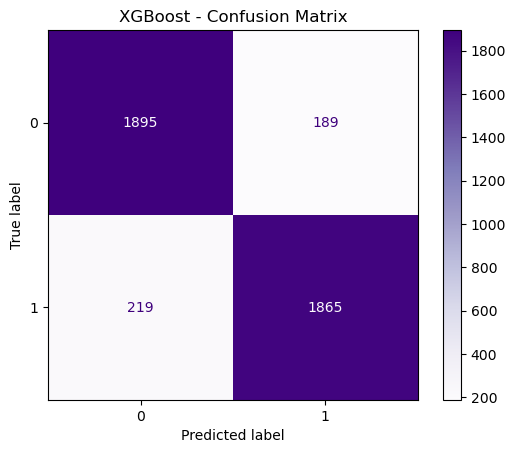

AdaBoost: Accuracy = 0.9016


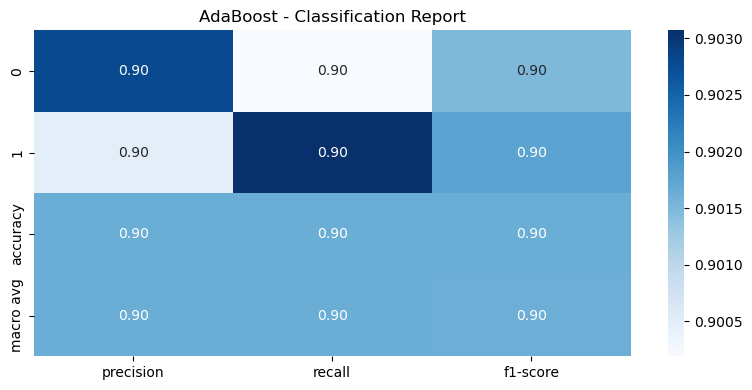

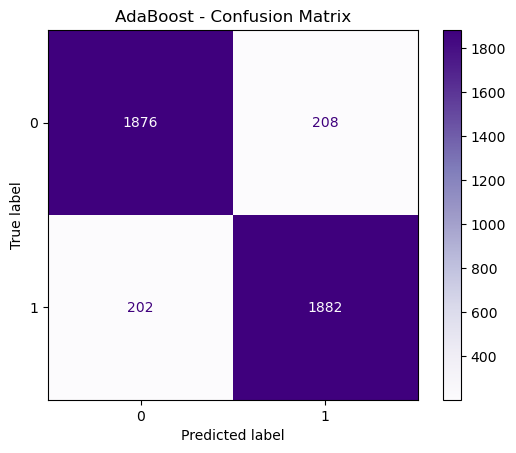

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from xgboost import XGBClassifier

# Define all classifiers in a dictionary
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
    "XGBoost": XGBClassifier(),
    "AdaBoost" : AdaBoostClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test_resampled)
    acc = accuracy_score(y_test_resampled, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")
    report = pd.DataFrame(classification_report(y_test_resampled, y_pred, output_dict=True)).transpose()

    # Plot Classification Report
    plt.figure(figsize=(8, 4))
    sns.heatmap(report.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")
    plt.title(f"{name} - Classification Report")
    plt.tight_layout()
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test_resampled, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Purples')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

## Best models from above after resampling

Gradient Boosting: Accuracy = 0.9048


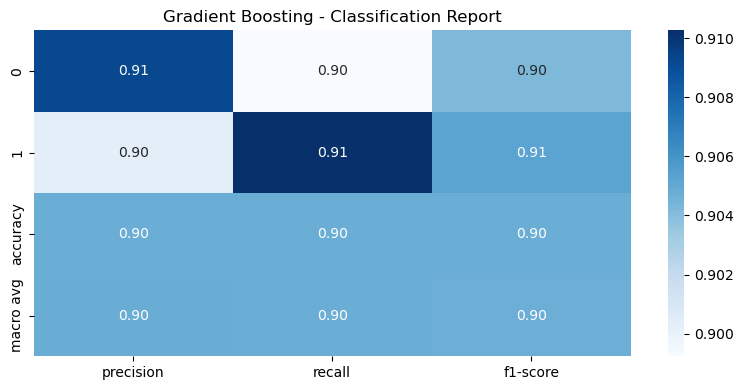

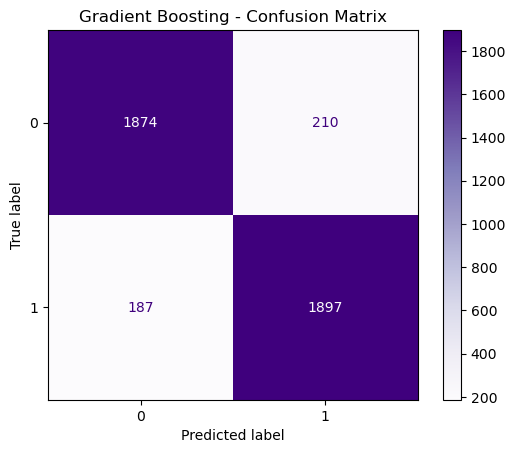

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': None, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Random Forest: Accuracy = 0.9050


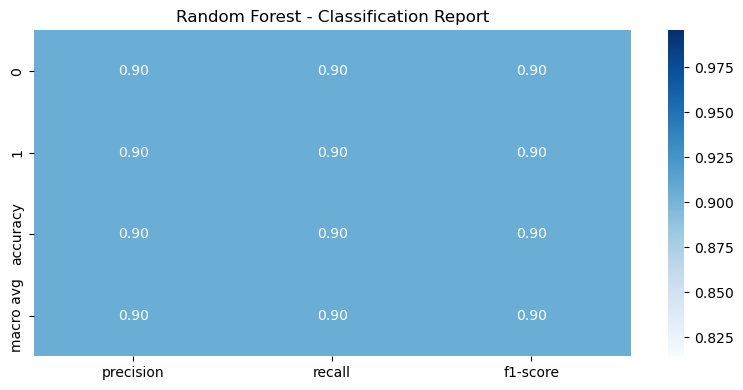

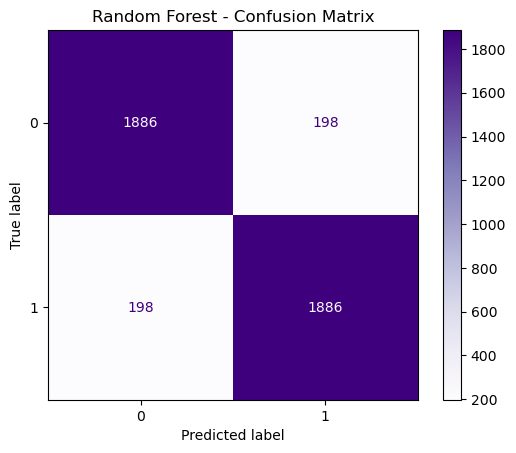

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
AdaBoost: Accuracy = 0.9016


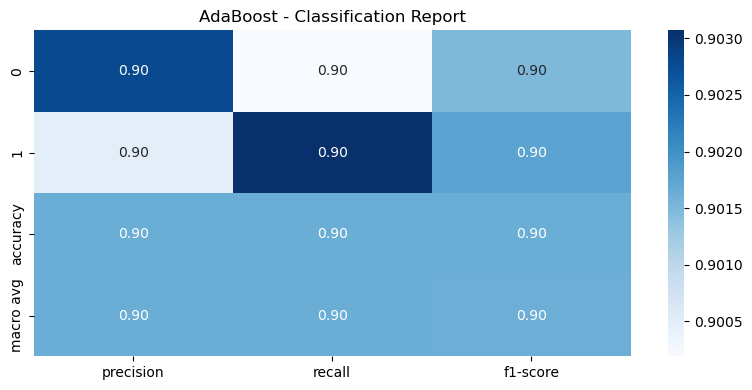

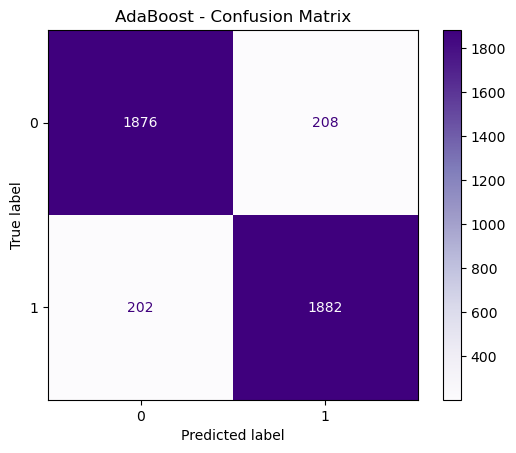

{'algorithm': 'SAMME.R', 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}


In [ ]:
best_models = {
    "Gradient Boosting": GradientBoostingClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost" : AdaBoostClassifier()
}

for name, model in best_models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test_resampled)
    acc = accuracy_score(y_test_resampled, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")
    report = pd.DataFrame(classification_report(y_test_resampled, y_pred, output_dict=True)).transpose()

    # Plot Classification Report
    plt.figure(figsize=(8, 4))
    sns.heatmap(report.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")
    plt.title(f"{name} - Classification Report")
    plt.tight_layout()
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test_resampled, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Purples')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
    print(model.get_params())



## Hyperparameter tuning using GridSearchCV

In [570]:
# model = GradientBoostingClassifier()

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.05, 0.1],
#     'max_depth': [3, 4, 5],
    
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
#     'subsample': [0.8, 1.0]
# }

# from sklearn.model_selection import GridSearchCV

# grid_search = GridSearchCV(
#     estimator=model,
#     param_grid=param_grid,
#     scoring='accuracy',
#     cv=5,
#     n_jobs=-1,
#     verbose=2
# )

# grid_search.fit(X_resampled,y_resampled)

# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)


In [571]:
# help(AdaBoostClassifier)

In [572]:
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV


# model = AdaBoostClassifier()

# # Define parameter grid with nested parameters using 'estimator__'
# param_grid = {
#     'n_estimators': [50,100, 200],
#     'learning_rate': [0.01, 0.05, 0.1,0.5,1],
# }

# # Grid search with cross-validation
# grid_search = GridSearchCV(
#     estimator=model,
#     param_grid=param_grid,
#     scoring='accuracy',  # suitable for imbalanced data
#     cv=5,
#     n_jobs=-1,
#     verbose=2
# )

# # Fit the model on the resampled datasetaaaa
# grid_search.fit(X_resampled, y_resampled)

# # Output best parameters and score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)


In [573]:
# model = RandomForestClassifier()

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 4, 5],    
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
# }

# from sklearn.model_selection import GridSearchCV

# grid_search = GridSearchCV(
#     estimator=model,
#     param_grid=param_grid,
#     scoring='accuracy',
#     cv=5,
#     n_jobs=-1,
#     verbose=2
# )

# grid_search.fit(X_resampled, y_resampled)
# grid_search.predict(X_test)

# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)


## Re-Evaluation of the model with the new parameter set from the hyperparameter tuning method
- If the hyperparameters are not performing well than the default parameters then I swapped them with the default parameters

Gradient Boosting: Accuracy = 0.9048


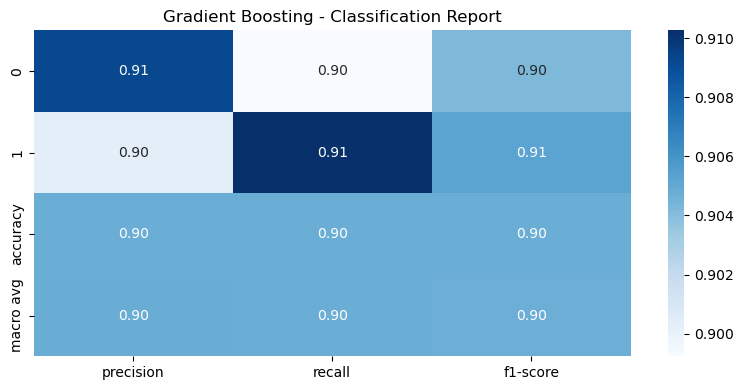

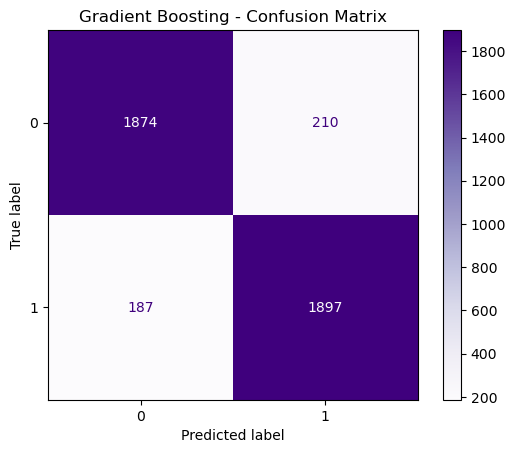

Random Forest: Accuracy = 0.8988


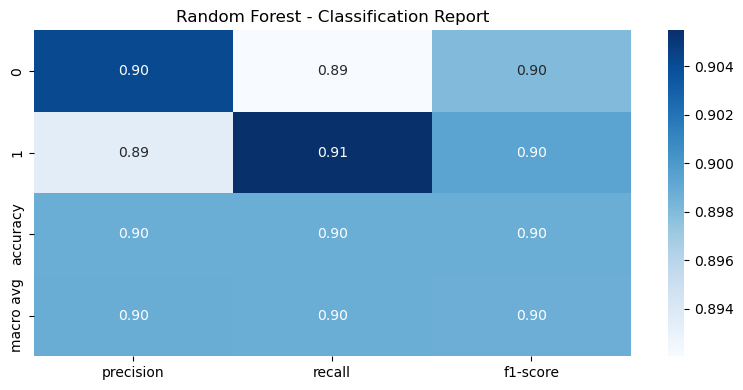

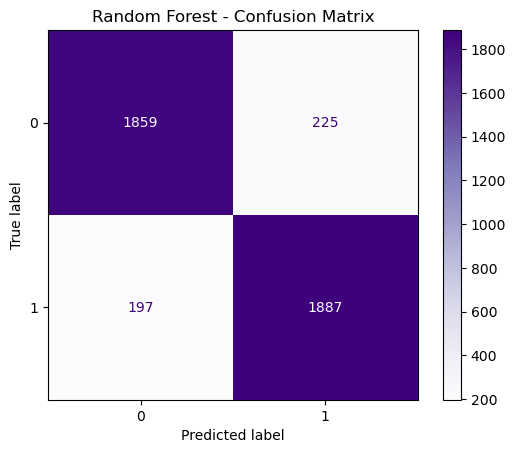

AdaBoost: Accuracy = 0.9016


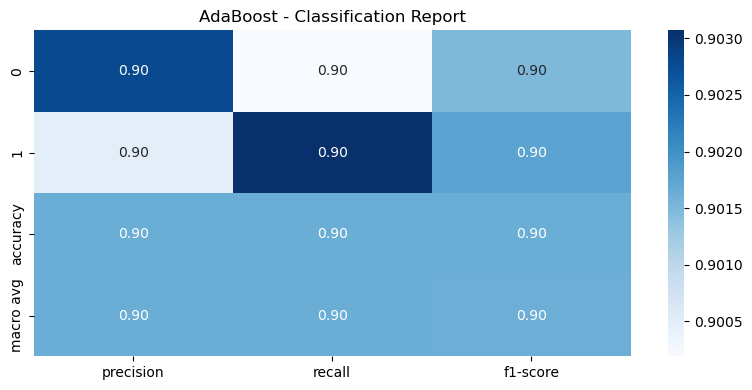

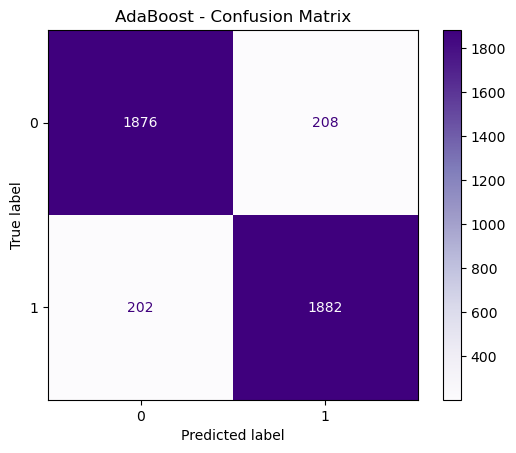

In [575]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.utils import compute_sample_weight

#{'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300, 'subsample': 0.8}
best_models = {
    "Gradient Boosting": GradientBoostingClassifier(learning_rate = 0.1, max_depth= 3, min_samples_leaf= 1,min_samples_split= 2, n_estimators= 100, subsample= 1),
    "Random Forest": RandomForestClassifier(max_depth = 5, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 200),
    "AdaBoost" : AdaBoostClassifier(learning_rate=1,n_estimators=50)
}

for name, model in best_models.items():
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test_resampled)
    acc = accuracy_score(y_test_resampled, y_pred)
    print(f"{name}: Accuracy = {acc:.4f}")
    report = pd.DataFrame(classification_report(y_test_resampled, y_pred, output_dict=True)).transpose()

    # Plot Classification Report
    plt.figure(figsize=(8, 4))
    sns.heatmap(report.iloc[:-1, :-1], annot=True, cmap='Blues', fmt=".2f")
    plt.title(f"{name} - Classification Report")
    plt.tight_layout()
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test_resampled, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Purples')
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

### Out of the above three final models the best performer is GradientBoosting because it has the best metrics based on the classification report.
### Final Model: GradientBoosting